In [89]:
import pandas as pd
import numpy as np

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [90]:
file_path = '/content/train.csv'

# Load data into a pandas DataFrame. Note: 1st column is ID
hotel_data = pd.read_csv(file_path, index_col=0)


In [91]:
hotel_data.tail()


,PropertyClass,ZoningCategory,RoadAccessLength,LandArea,RoadType,ServiceLaneType,PlotShape,LandElevation,UtilityAccess,PlotConfiguration,...,SwimmingPoolArea,PoolQuality,BoundaryFence,ExtraFacility,ExtraFacilityValue,MonthSold,YearSold,DealType,DealCondition,HotelValue
Id,,,,,,,,,,,,,,,,,,,,,
1096,20,RL,78.0,9317,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,3,2007,WD,Normal,176432.0
1131,50,RL,65.0,7804,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,12,2009,WD,Normal,135000.0
1295,20,RL,60.0,8172,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,115000.0
861,50,RL,55.0,7642,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,GdPrv,NaN,0,6,2007,WD,Normal,189950.0
1127,120,RL,53.0,3684,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,174000.0


In [92]:
hotel_data.shape

(1200, 80)

In [93]:
# List of numerical attributes
hotel_data.select_dtypes(exclude=['object']).columns

Index(['PropertyClass', 'RoadAccessLength', 'LandArea', 'OverallQuality',
       'OverallCondition', 'ConstructionYear', 'RenovationYear', 'FacadeArea',
       'BasementFacilitySF1', 'BasementFacilitySF2', 'BasementUnfinishedSF',
       'BasementTotalSF', 'GroundFloorArea', 'UpperFloorArea',
       'LowQualityArea', 'UsableArea', 'BasementFullBaths',
       'BasementHalfBaths', 'FullBaths', 'HalfBaths', 'GuestRooms', 'Kitchens',
       'TotalRooms', 'Lounges', 'ParkingConstructionYear', 'ParkingCapacity',
       'ParkingArea', 'TerraceArea', 'OpenVerandaArea', 'EnclosedVerandaArea',
       'SeasonalPorchArea', 'ScreenPorchArea', 'SwimmingPoolArea',
       'ExtraFacilityValue', 'MonthSold', 'YearSold', 'HotelValue'],
      dtype='object')

In [94]:
len(hotel_data.select_dtypes(exclude='object').columns)

37

In [95]:
hotel_data.select_dtypes(exclude=['object']).describe().round(decimals=2)

,PropertyClass,RoadAccessLength,LandArea,OverallQuality,OverallCondition,ConstructionYear,RenovationYear,FacadeArea,BasementFacilitySF1,BasementFacilitySF2,...,TerraceArea,OpenVerandaArea,EnclosedVerandaArea,SeasonalPorchArea,ScreenPorchArea,SwimmingPoolArea,ExtraFacilityValue,MonthSold,YearSold,HotelValue
count,1200.00,977.00,1200.00,1200.00,1200.00,1200.00,1200.00,1193.00,1200.00,1200.00,...,1200.00,1200.00,1200.00,1200.00,1200.00,1200.00,1200.00,1200.00,1200.00,1200.00
mean,57.01,70.23,10662.05,6.12,5.58,1971.31,1985.04,103.45,447.33,44.74,...,96.09,49.28,21.42,3.85,15.60,2.88,49.90,6.35,2007.82,181709.90
std,42.68,24.89,10641.84,1.37,1.11,30.59,20.70,172.34,460.47,157.53,...,129.18,69.13,61.43,31.46,56.74,41.09,545.67,2.68,1.32,77638.66
min,20.00,21.00,1300.00,1.00,1.00,1872.00,1950.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,2006.00,34900.00
25%,20.00,59.00,7589.50,5.00,5.00,1954.00,1966.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00,2007.00,130000.00
50%,50.00,70.00,9600.00,6.00,5.00,1973.00,1994.00,0.00,384.00,0.00,...,0.00,27.00,0.00,0.00,0.00,0.00,0.00,6.00,2008.00,165000.00
75%,70.00,80.00,11700.00,7.00,6.00,2001.00,2004.00,166.00,725.00,0.00,...,168.00,73.00,0.00,0.00,0.00,0.00,0.00,8.00,2009.00,215000.00
max,190.00,313.00,215245.00,10.00,9.00,2010.00,2010.00,1378.00,5644.00,1127.00,...,857.00,547.00,552.00,508.00,480.00,738.00,15500.00,12.00,2010.00,745000.00


In [96]:
hotel_data.select_dtypes(include=['object']).columns

Index(['ZoningCategory', 'RoadType', 'ServiceLaneType', 'PlotShape',
       'LandElevation', 'UtilityAccess', 'PlotConfiguration', 'LandSlope',
       'District', 'NearbyTransport1', 'NearbyTransport2', 'PropertyType',
       'HotelStyle', 'RoofDesign', 'RoofMaterial', 'ExteriorPrimary',
       'ExteriorSecondary', 'FacadeType', 'ExteriorQuality',
       'ExteriorCondition', 'FoundationType', 'BasementHeight',
       'BasementCondition', 'BasementExposure', 'BasementFacilityType1',
       'BasementFacilityType2', 'HeatingType', 'HeatingQuality', 'CentralAC',
       'ElectricalSystem', 'KitchenQuality', 'PropertyFunctionality',
       'LoungeQuality', 'ParkingType', 'ParkingFinish', 'ParkingQuality',
       'ParkingCondition', 'DrivewayType', 'PoolQuality', 'BoundaryFence',
       'ExtraFacility', 'DealType', 'DealCondition'],
      dtype='object')

In [97]:
len(hotel_data.select_dtypes(include='object').columns)

43

In [98]:
hotel_data.select_dtypes(include=['object']).describe()

,ZoningCategory,RoadType,ServiceLaneType,PlotShape,LandElevation,UtilityAccess,PlotConfiguration,LandSlope,District,NearbyTransport1,...,ParkingType,ParkingFinish,ParkingQuality,ParkingCondition,DrivewayType,PoolQuality,BoundaryFence,ExtraFacility,DealType,DealCondition
count,1200,1200,75,1200,1200,1200,1200,1200,1200,1200,...,1135,1135,1135,1135,1200,6,237,46,1200,1200
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Fa,MnPrv,Shed,WD,Normal
freq,949,1196,45,751,1085,1199,849,1137,186,1032,...,714,492,1078,1089,1100,2,132,41,1039,988


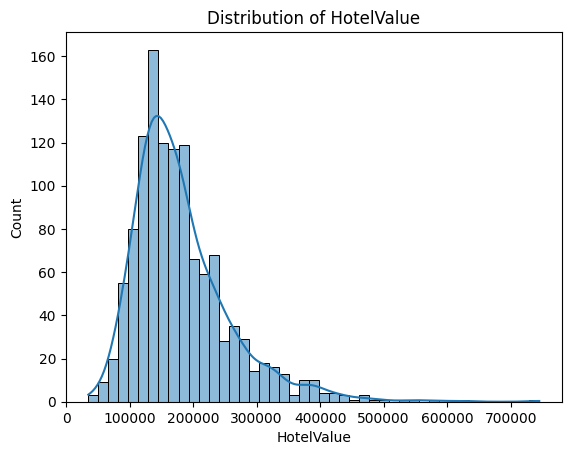

In [99]:
target = hotel_data.HotelValue

plt.figure()
sns.histplot(target, kde=True)
plt.title('Distribution of HotelValue')
plt.show()


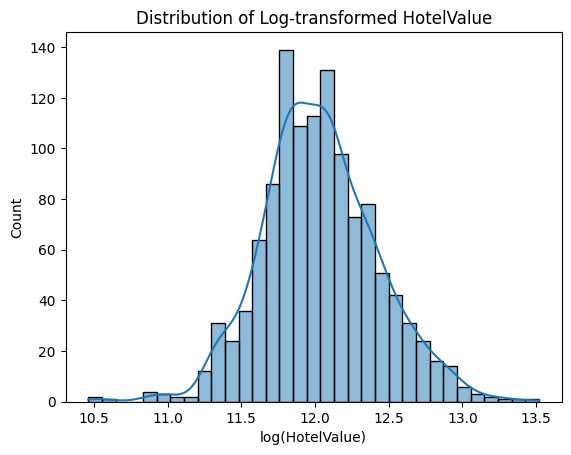

In [100]:
import numpy as np

target = hotel_data.HotelValue

plt.figure()
sns.histplot(np.log(target), kde=True)
plt.title('Distribution of Log-transformed HotelValue')
plt.xlabel('log(HotelValue)')
plt.show()


In [101]:
hotelvalue_skew = target.skew().round(2)
log_hotelvalue_skew = np.log(target).skew().round(2)

print(f"HotelValue has a skew of {hotelvalue_skew}, "
      f"while the log-transformed HotelValue improves the skew to {log_hotelvalue_skew}.")

HotelValue has a skew of 1.73, while the log-transformed HotelValue improves the skew to 0.13.


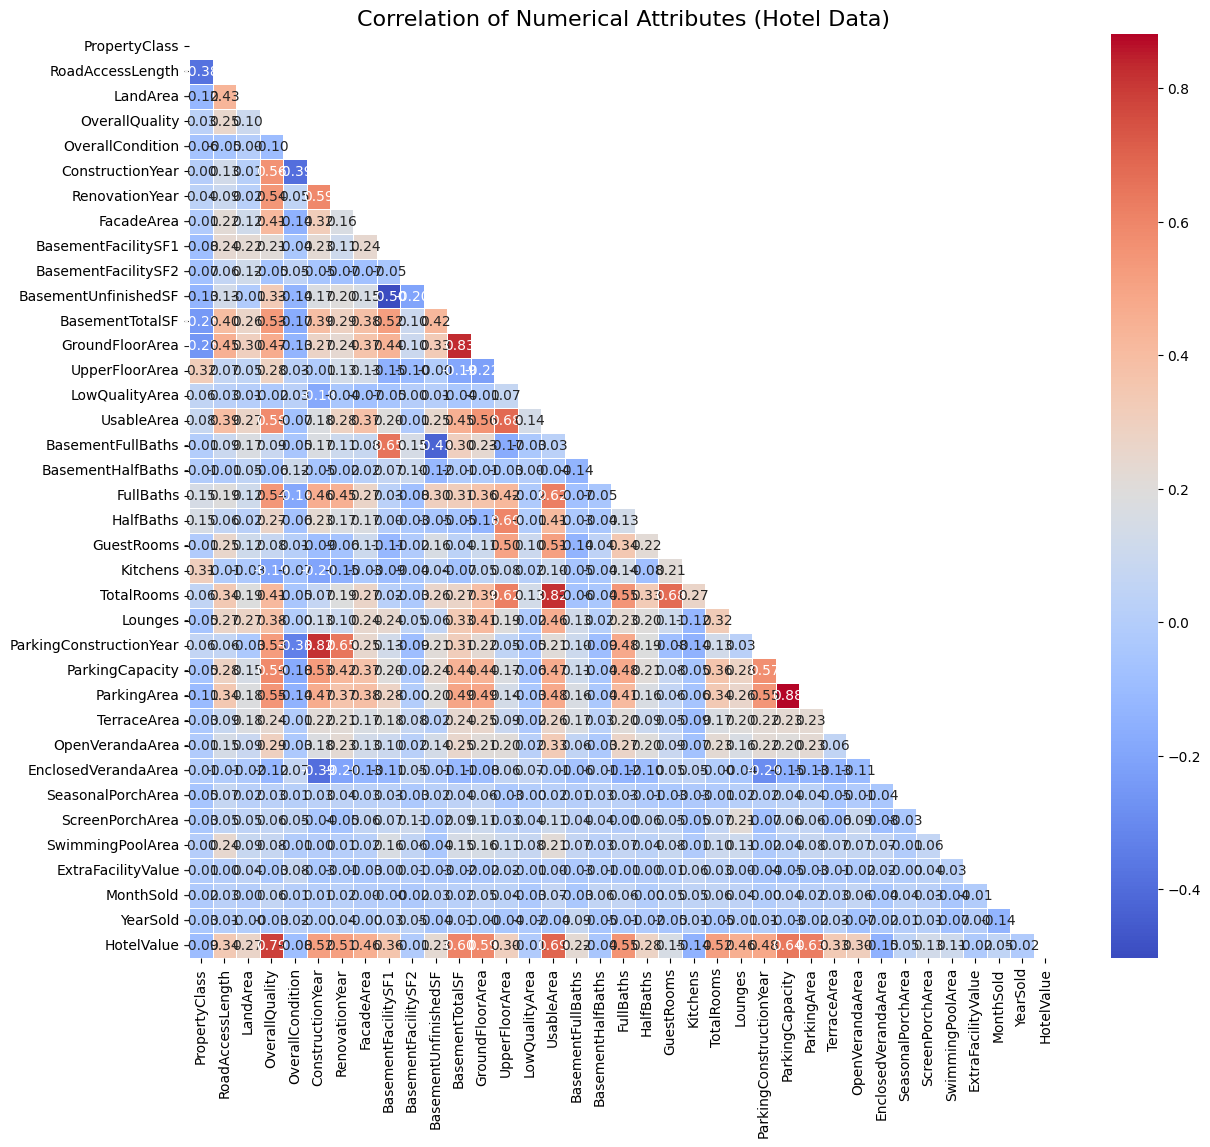

In [102]:
numeric_data = hotel_data.select_dtypes(include=np.number)

correlation = numeric_data.corr()

plt.figure(figsize=(14,12))
plt.title('Correlation of Numerical Attributes (Hotel Data)', fontsize=16)

# Mask upper triangle
mask = np.triu(np.ones_like(correlation, dtype=bool))

sns.heatmap(correlation, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.show()

In [103]:
# Correlation of features with HotelValue
correlation['HotelValue'].sort_values(ascending=False).head(15)


,HotelValue
HotelValue,1.000000
OverallQuality,0.787901
UsableArea,0.694310
ParkingCapacity,0.642310
ParkingArea,0.625122
BasementTotalSF,0.604161
GroundFloorArea,0.594268
FullBaths,0.554357
TotalRooms,0.518993
ConstructionYear,0.518934


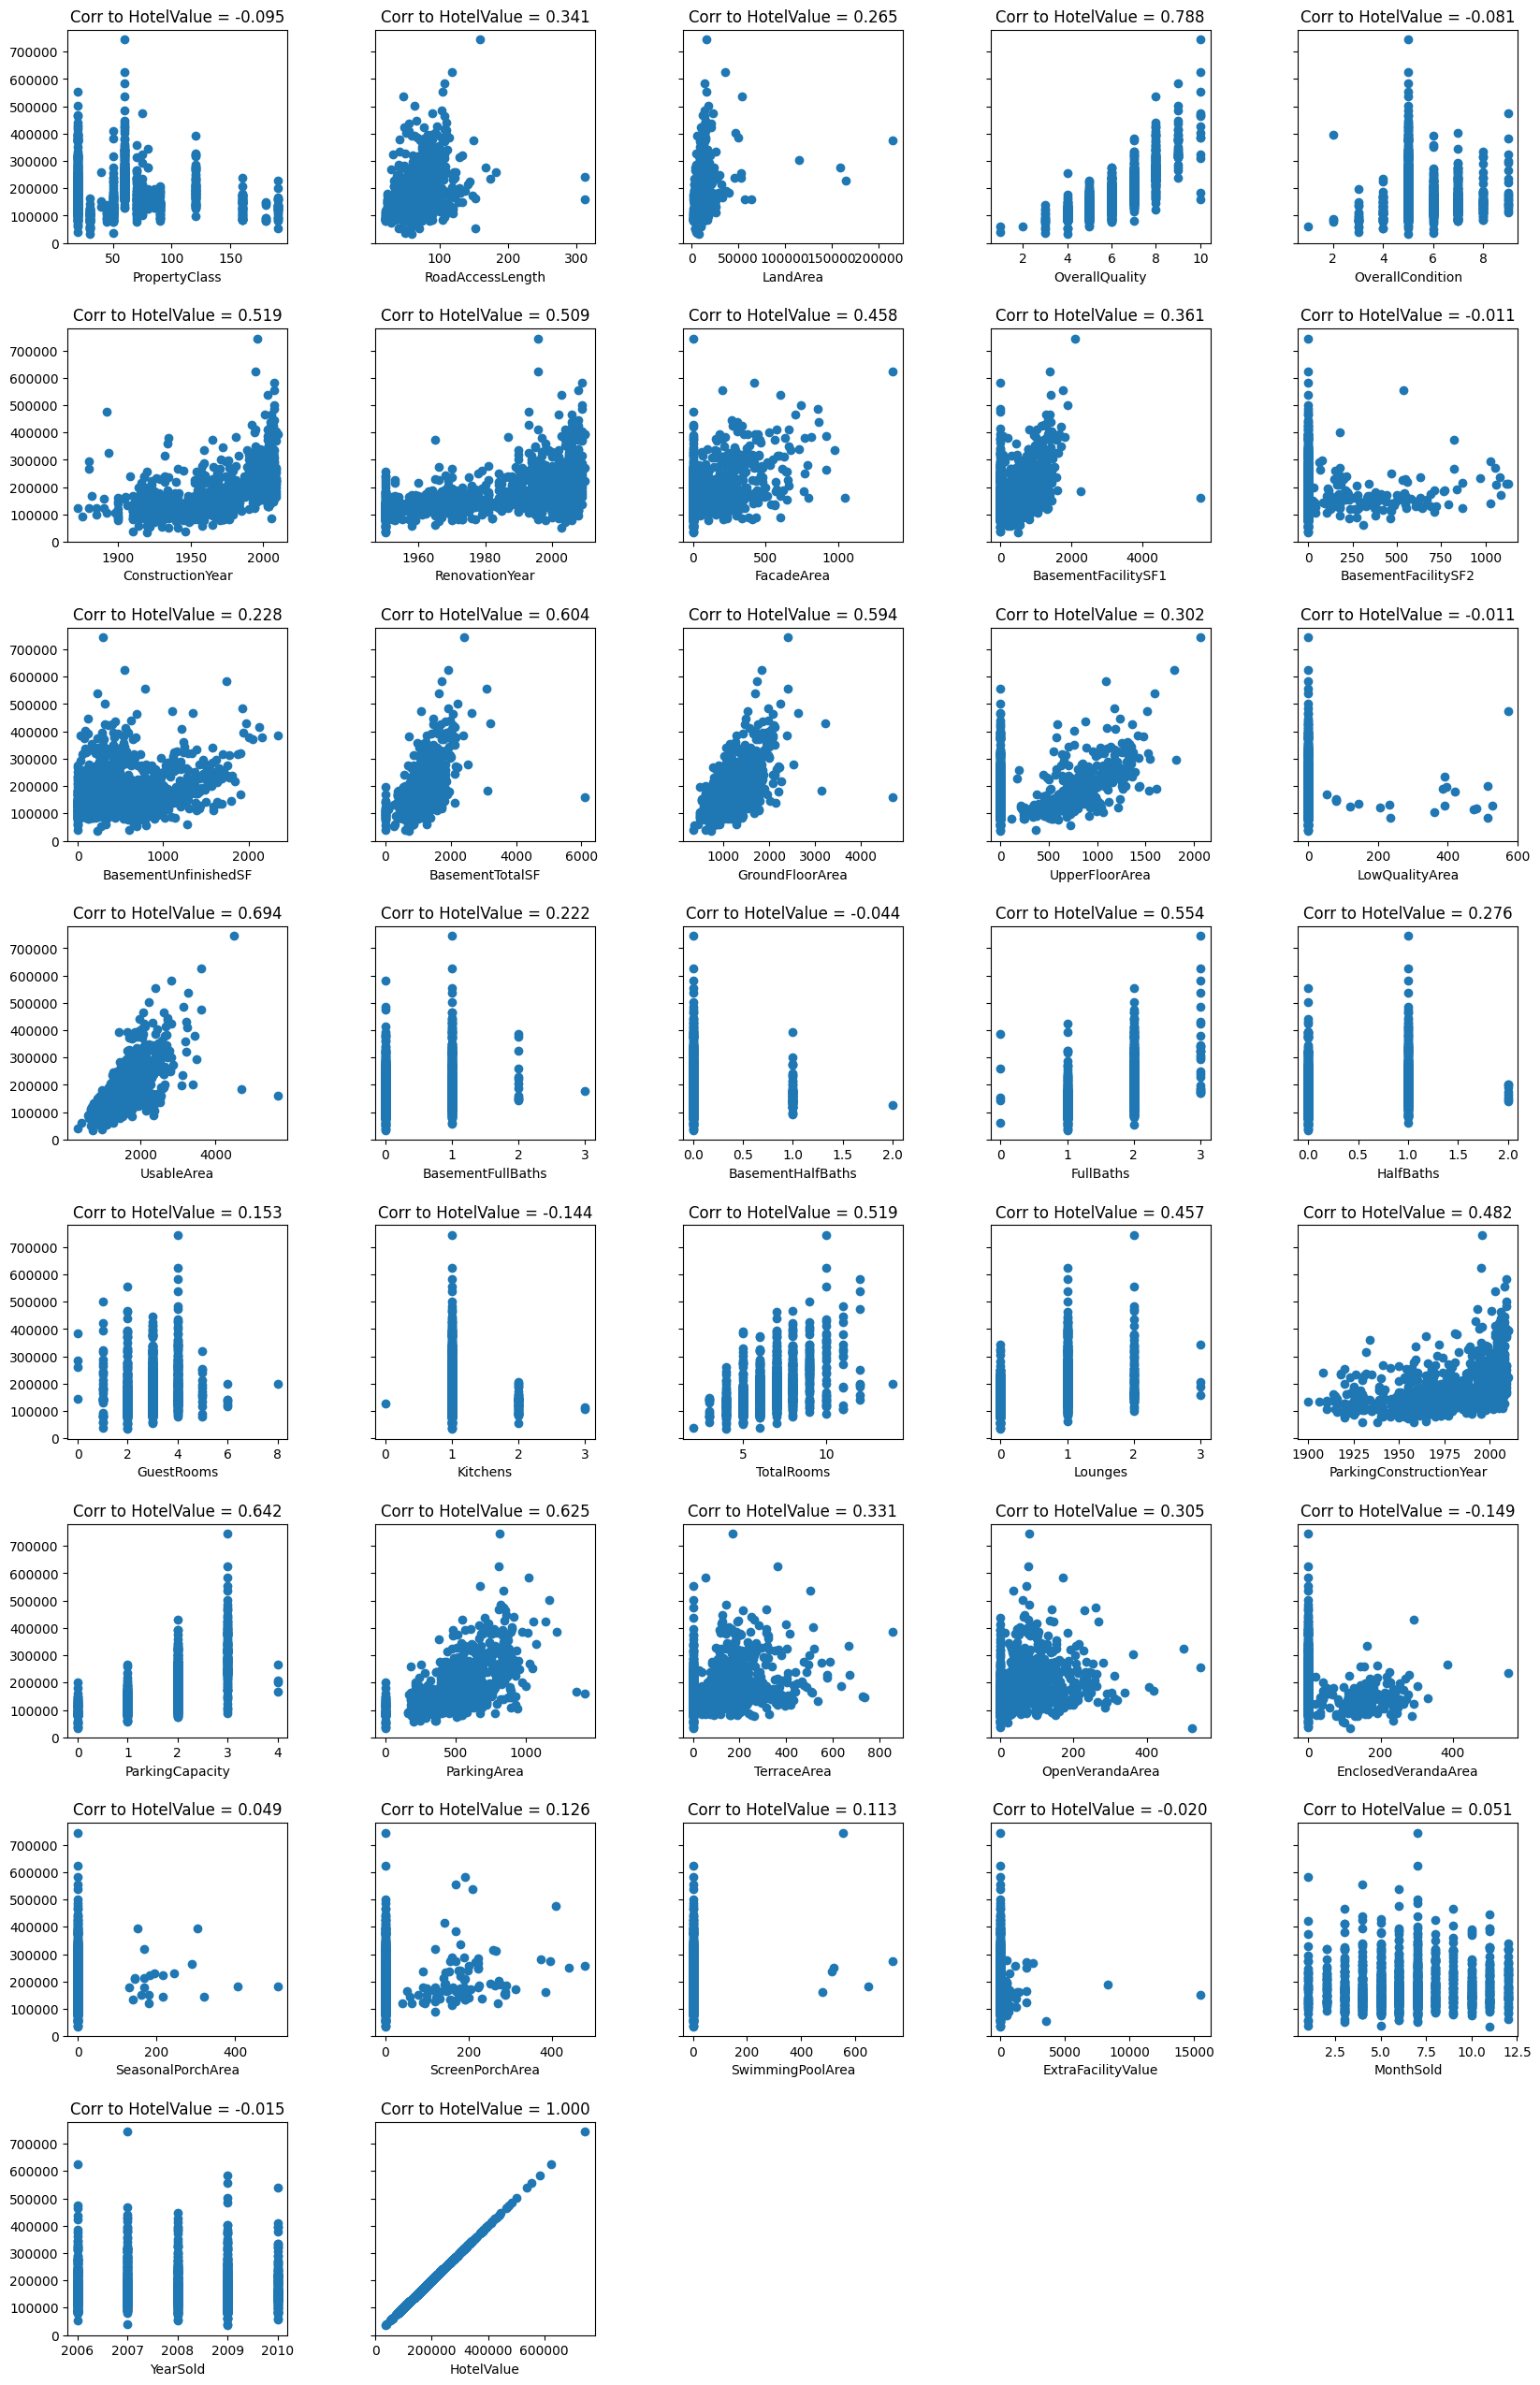

In [104]:
num_columns = hotel_data.select_dtypes(include=np.number).columns
corr_to_value = hotel_data[num_columns].corr()['HotelValue']

# Grid setup
n_cols = 5
n_rows = int(np.ceil(len(num_columns) / n_cols))

fig, ax_arr = plt.subplots(n_rows, n_cols, figsize=(20, n_rows*4), sharey=True)
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for j in range(n_rows):
    for i in range(n_cols):
        index = i + j*n_cols
        ax = ax_arr[j, i] if n_rows > 1 else ax_arr[i]
        if index < len(num_columns):
            ax.scatter(hotel_data[num_columns[index]], hotel_data['HotelValue'])
            ax.set_xlabel(num_columns[index])
            ax.set_title(f"Corr to HotelValue = {corr_to_value[num_columns[index]]:.3f}")
        else:
            ax.axis('off')  # hide empty subplots

plt.show()

In [105]:
# Check missing values in numeric columns
num_attributes = hotel_data.select_dtypes(include=np.number)
missing_values = num_attributes.isna().sum().sort_values(ascending=False)
missing_values.head()


,0
RoadAccessLength,223
ParkingConstructionYear,65
FacadeArea,7
PropertyClass,0
LandArea,0


In [106]:
cat_columns = hotel_data.select_dtypes(include='object').columns
print(cat_columns)

Index(['ZoningCategory', 'RoadType', 'ServiceLaneType', 'PlotShape',
       'LandElevation', 'UtilityAccess', 'PlotConfiguration', 'LandSlope',
       'District', 'NearbyTransport1', 'NearbyTransport2', 'PropertyType',
       'HotelStyle', 'RoofDesign', 'RoofMaterial', 'ExteriorPrimary',
       'ExteriorSecondary', 'FacadeType', 'ExteriorQuality',
       'ExteriorCondition', 'FoundationType', 'BasementHeight',
       'BasementCondition', 'BasementExposure', 'BasementFacilityType1',
       'BasementFacilityType2', 'HeatingType', 'HeatingQuality', 'CentralAC',
       'ElectricalSystem', 'KitchenQuality', 'PropertyFunctionality',
       'LoungeQuality', 'ParkingType', 'ParkingFinish', 'ParkingQuality',
       'ParkingCondition', 'DrivewayType', 'PoolQuality', 'BoundaryFence',
       'ExtraFacility', 'DealType', 'DealCondition'],
      dtype='object')


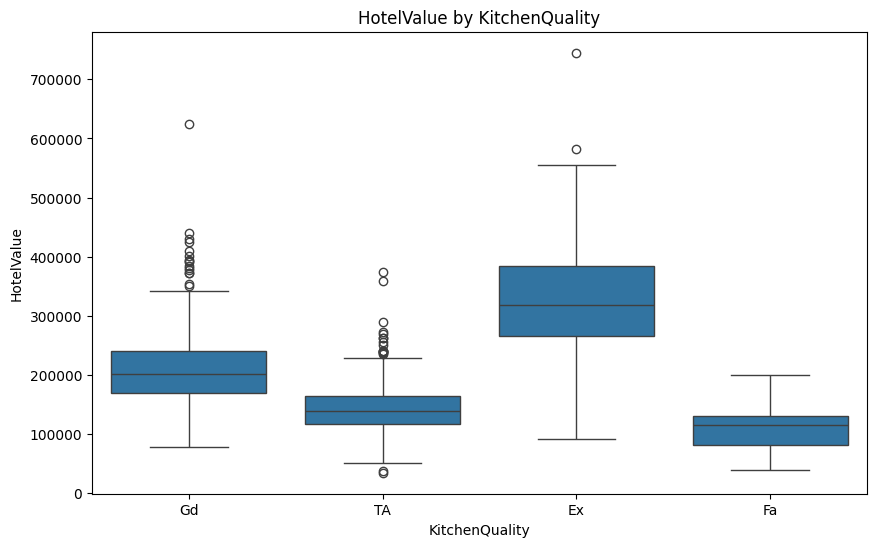

In [107]:
var = hotel_data['KitchenQuality']
plt.figure(figsize=(10,6))
sns.boxplot(x=var, y=hotel_data['HotelValue'])
plt.title('HotelValue by KitchenQuality')
plt.show()

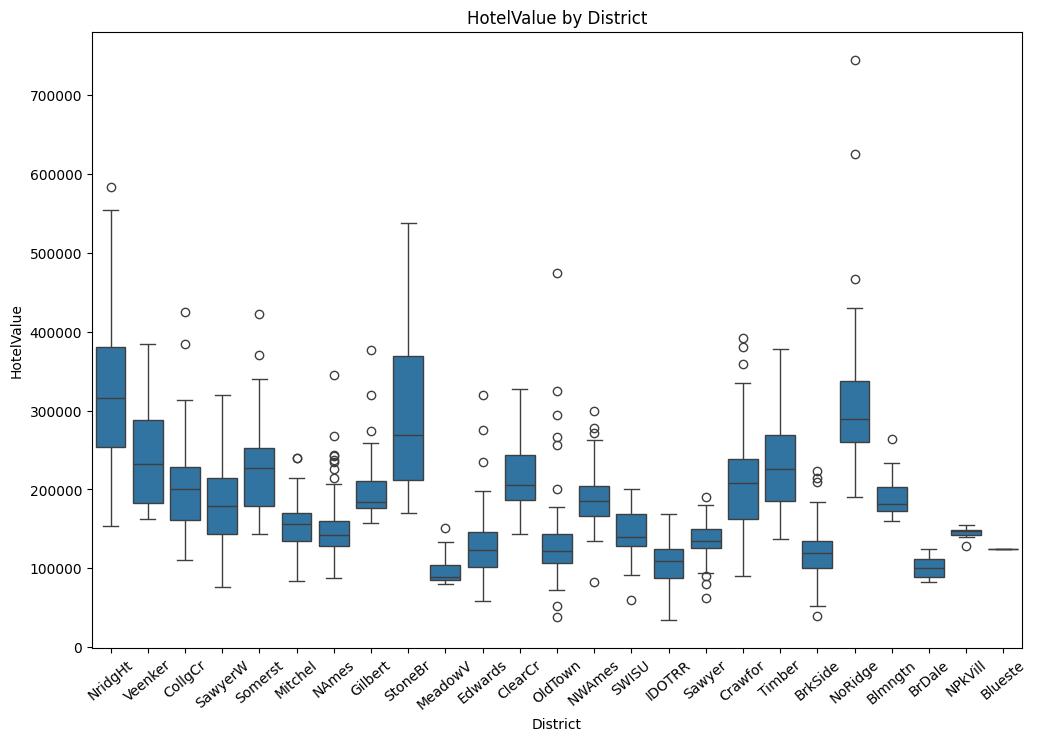

In [108]:
# 3️⃣ Boxplot for District vs HotelValue
plt.figure(figsize=(12,8))
sns.boxplot(x=hotel_data['District'], y=hotel_data['HotelValue'])
plt.xticks(rotation=40)
plt.title('HotelValue by District')
plt.show()


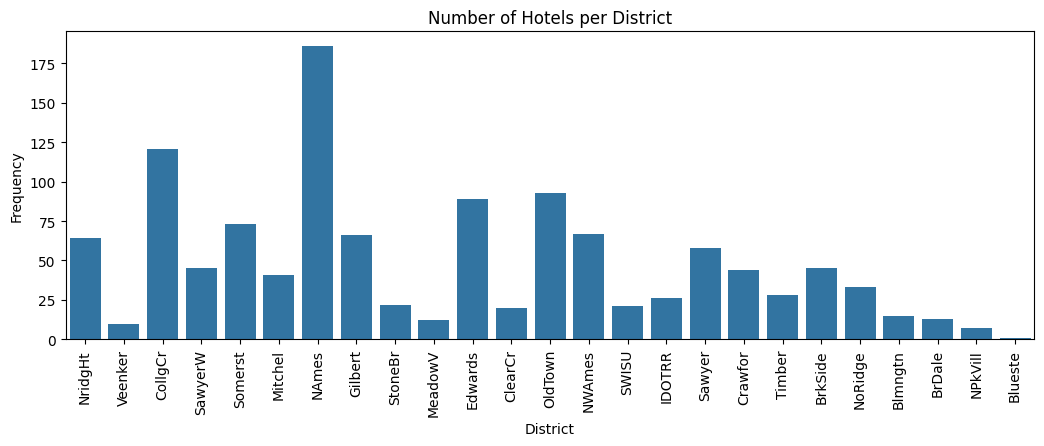

In [109]:
plt.figure(figsize=(12.5,4))
sns.countplot(x='District', data=hotel_data)
plt.xticks(rotation=90)
plt.ylabel('Frequency')
plt.title('Number of Hotels per District')
plt.show()

In [110]:
missing_cat = hotel_data[cat_columns].isna().sum().sort_values(ascending=False)
missing_cat.head(17)

,0
PoolQuality,1194
ExtraFacility,1154
ServiceLaneType,1125
BoundaryFence,963
FacadeType,702
LoungeQuality,560
ParkingFinish,65
ParkingQuality,65
ParkingType,65
ParkingCondition,65


In [111]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

In [112]:
# Make a copy
hotel_data_copy = hotel_data.copy()

# ==========================
# Dealing with missing/null values

# 1️⃣ Numerical columns
# Example: FacadeArea (equivalent to MasVnrArea)
hotel_data_copy['FacadeArea'] = hotel_data_copy['FacadeArea'].fillna(0)

# Example: RoadAccessLength (equivalent to LotFrontage)
# Fill missing values with median per District
hotel_data_copy['RoadAccessLength'] = hotel_data_copy.groupby('District')['RoadAccessLength'].transform(
    lambda x: x.fillna(x.median())
)

# 2️⃣ Categorical columns
cat_cols_fill_none = ['PoolQuality', 'ExtraFacility', 'ServiceLaneType', 'BoundaryFence',
                      'LoungeQuality', 'ParkingCondition', 'ParkingQuality', 'ParkingFinish',
                      'ParkingType', 'BasementFacilityType2', 'BasementExposure',
                      'BasementFacilityType1', 'BasementHeight', 'BasementCondition',
                      'FacadeType']

for cat in cat_cols_fill_none:
    hotel_data_copy[cat] = hotel_data_copy[cat].fillna("None")


In [113]:
# Check remaining missing values after imputation
hotel_data_copy.isna().sum().sort_values(ascending=False).head()


,0
ParkingConstructionYear,65
ElectricalSystem,1
PropertyClass,0
ZoningCategory,0
RoadType,0


In [114]:
# Remove outliers based on scatter plot observations against HotelValue
hotel_data_copy = hotel_data_copy.drop(
    hotel_data_copy['RoadAccessLength'][hotel_data_copy['RoadAccessLength'] > 200].index
)
hotel_data_copy = hotel_data_copy.drop(
    hotel_data_copy['LandArea'][hotel_data_copy['LandArea'] > 100000].index
)
hotel_data_copy = hotel_data_copy.drop(
    hotel_data_copy['BasementFacilitySF1'][hotel_data_copy['BasementFacilitySF1'] > 4000].index
)
hotel_data_copy = hotel_data_copy.drop(
    hotel_data_copy['BasementTotalSF'][hotel_data_copy['BasementTotalSF'] > 6000].index
)
hotel_data_copy = hotel_data_copy.drop(
    hotel_data_copy['GroundFloorArea'][hotel_data_copy['GroundFloorArea'] > 4000].index
)
hotel_data_copy = hotel_data_copy.drop(
    hotel_data_copy['UsableArea'][(hotel_data_copy['UsableArea'] > 4000) &
                                   (hotel_data_copy['HotelValue'] < 300000)].index
)
hotel_data_copy = hotel_data_copy.drop(
    hotel_data_copy['LowQualityArea'][hotel_data_copy['LowQualityArea'] > 550].index
)


In [115]:
hotel_data_copy['HotelValue'] = np.log(hotel_data_copy['HotelValue'])
hotel_data_copy = hotel_data_copy.rename(columns={'HotelValue': 'HotelValue_log'})

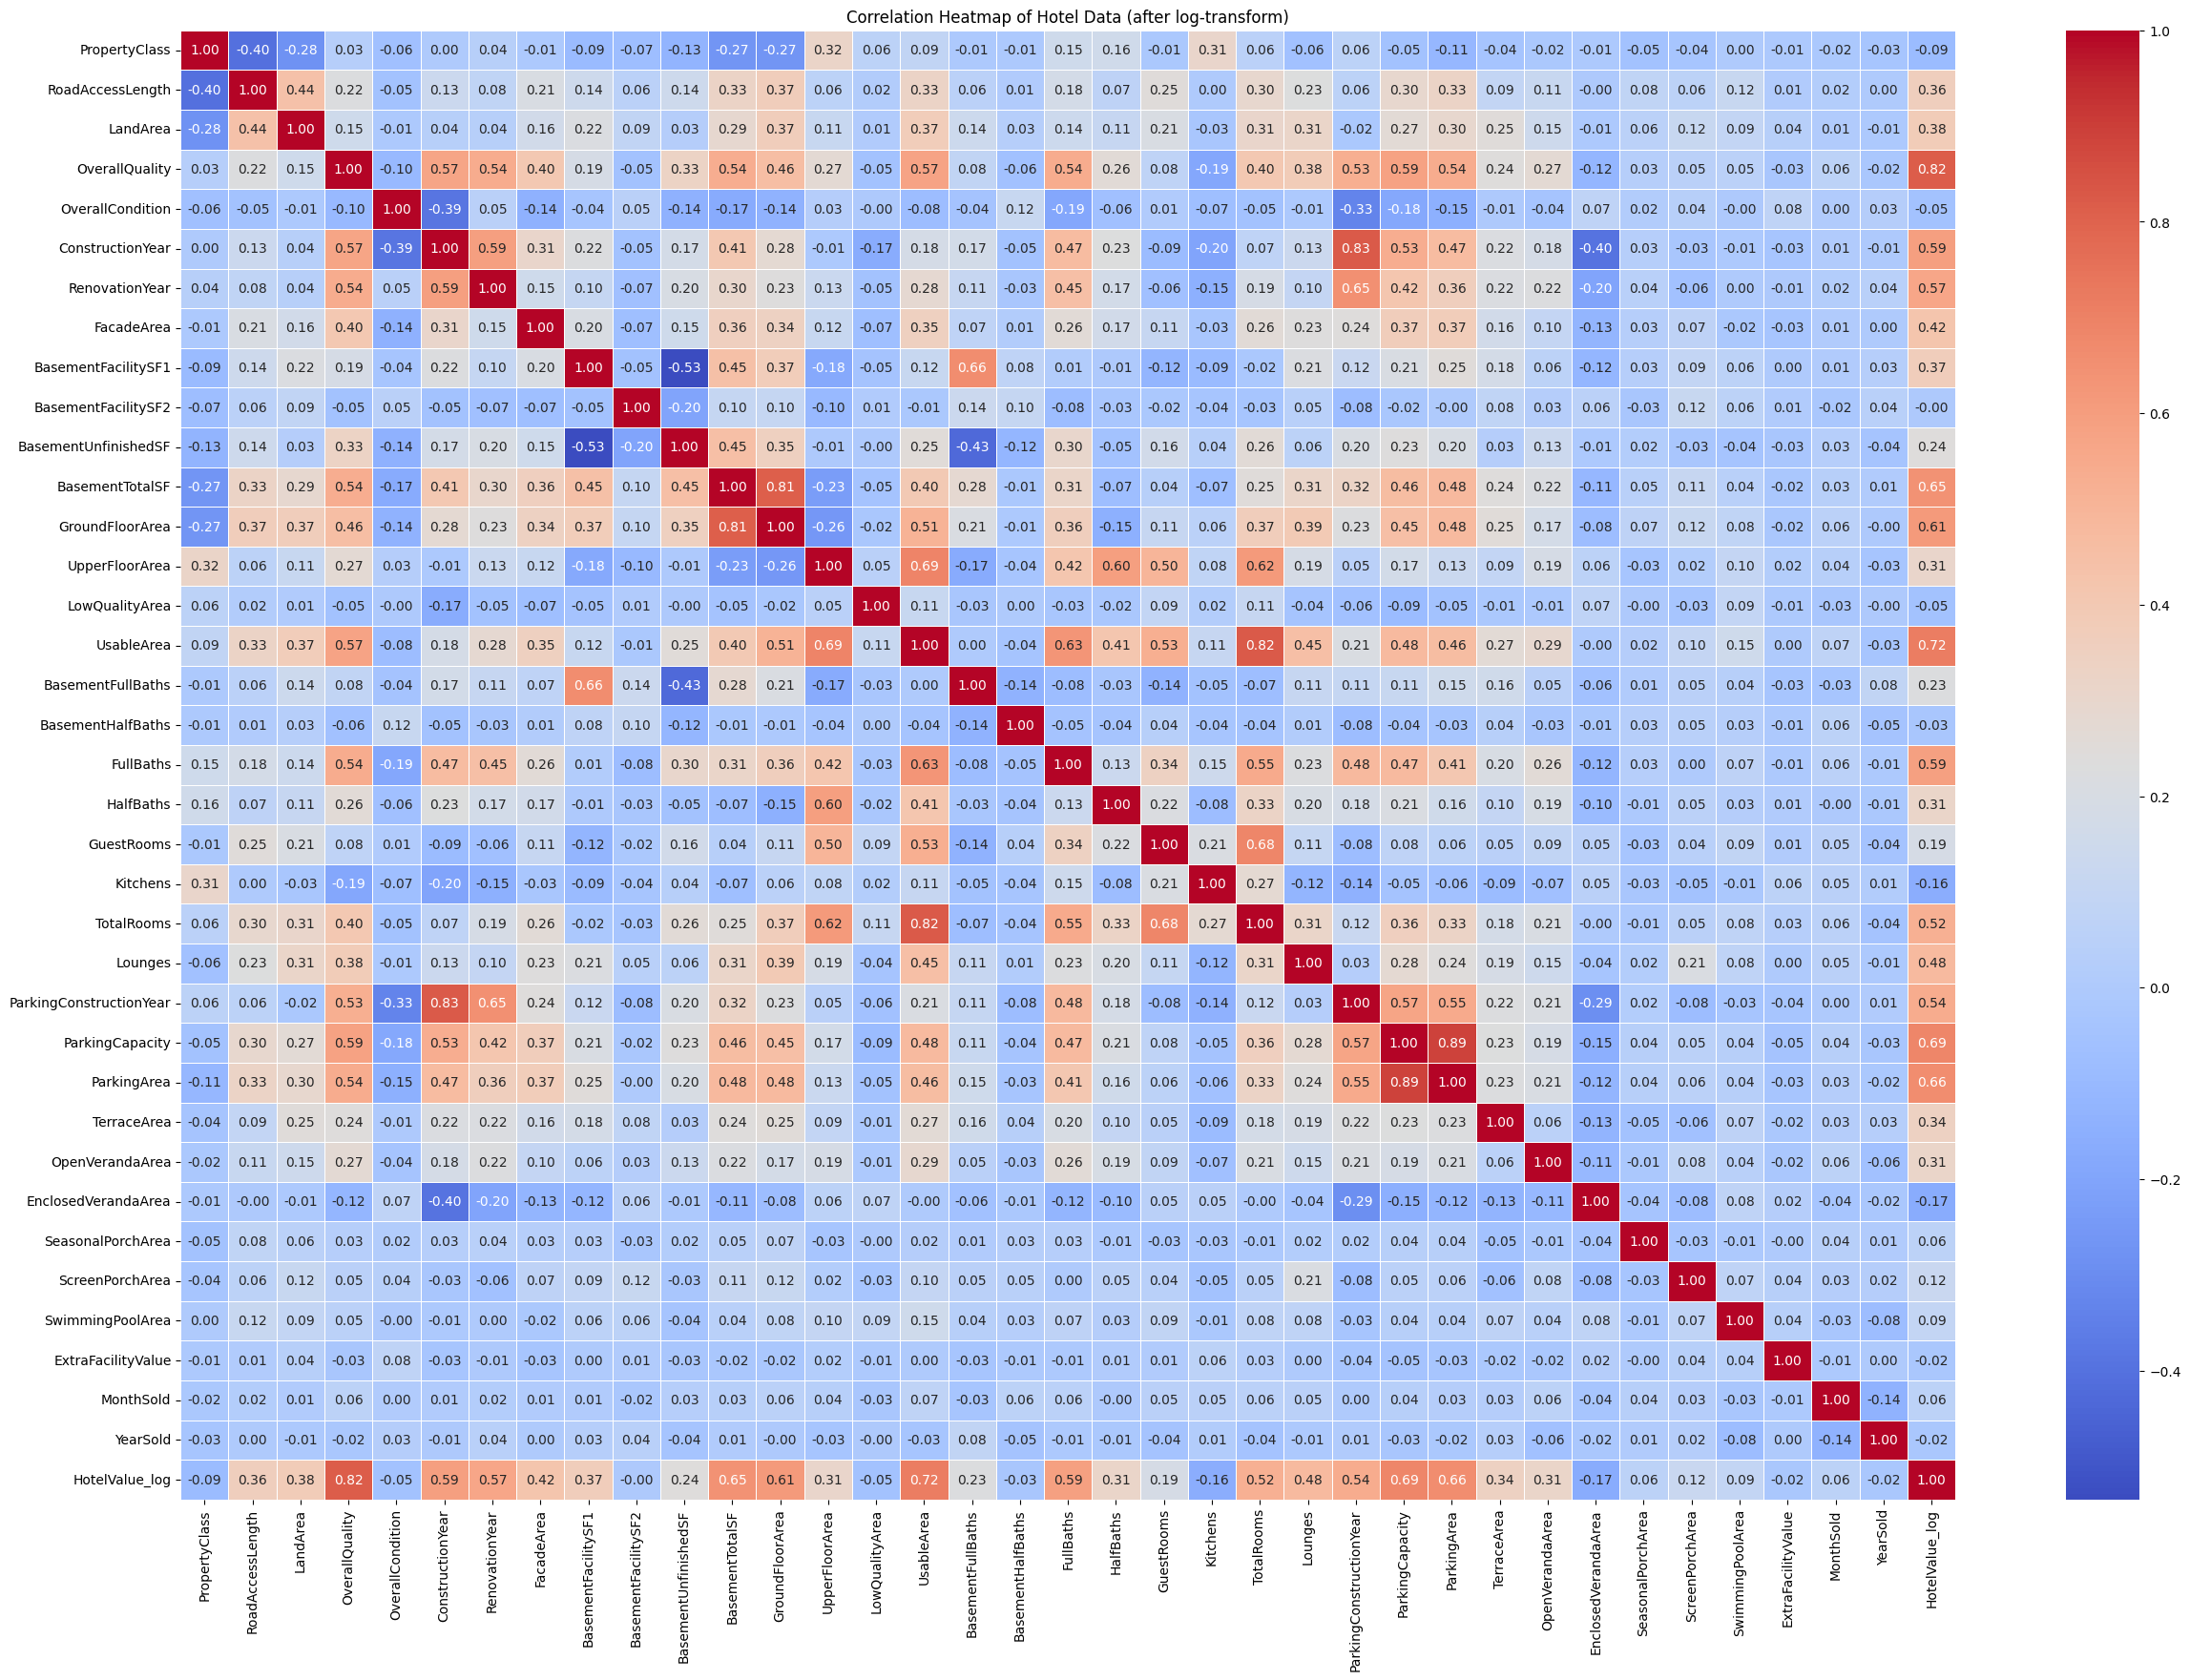

In [116]:
numeric_data = hotel_data_copy.select_dtypes(include=np.number)

# Compute correlation
transformed_corr = numeric_data.corr()

plt.figure(figsize=(30,20))
sns.heatmap(transformed_corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Hotel Data (after log-transform)")
plt.show()

In [117]:
# Columns to drop (highly correlated or irrelevant for modeling)
attributes_drop = ['HotelValue_log', 'ExtraFacilityValue', 'PropertyClass', 'MonthSold', 'YearSold',
                   'ParkingArea', 'ParkingConstructionYear', 'TotalRooms']

# Features and target
X = hotel_data_copy.drop(attributes_drop, axis=1)
y = hotel_data_copy['HotelValue_log']

# One-hot encoding for categorical variables
X = pd.get_dummies(X)

# Split into training and validation sets
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

# Final imputation for any remaining missing values
my_imputer = SimpleImputer()
train_X = my_imputer.fit_transform(train_X)
val_X = my_imputer.transform(val_X)

In [118]:
from sklearn.metrics import mean_absolute_error

from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor


In [119]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
def inv_y(transformed_y):
    return np.exp(transformed_y)

# Series to collate mean absolute errors for each algorithm
mae_compare = pd.Series(dtype=float)
mae_compare.index.name = 'Algorithm'

# -------------------------------
# Random Forest
rf_model = RandomForestRegressor(random_state=5)
rf_model.fit(train_X, train_y)
rf_val_predictions = rf_model.predict(val_X)
rf_val_mae = mean_absolute_error(inv_y(rf_val_predictions), inv_y(val_y))
mae_compare['RandomForest'] = rf_val_mae

# -------------------------------
# XGBoost
xgb_model = XGBRegressor(n_estimators=1000, learning_rate=0.05, random_state=5)
xgb_model.fit(train_X, train_y)
xgb_val_predictions = xgb_model.predict(val_X)
xgb_val_mae = mean_absolute_error(inv_y(xgb_val_predictions), inv_y(val_y))
mae_compare['XGBoost'] = xgb_val_mae

# -------------------------------
# Linear Regression
linear_model = LinearRegression()
linear_model.fit(train_X, train_y)
linear_val_predictions = linear_model.predict(val_X)
linear_val_mae = mean_absolute_error(inv_y(linear_val_predictions), inv_y(val_y))
mae_compare['LinearRegression'] = linear_val_mae

# -------------------------------
# Lasso
lasso_model = Lasso(alpha=0.0005, random_state=5)
lasso_model.fit(train_X, train_y)
lasso_val_predictions = lasso_model.predict(val_X)
lasso_val_mae = mean_absolute_error(inv_y(lasso_val_predictions), inv_y(val_y))
mae_compare['Lasso'] = lasso_val_mae

# -------------------------------
# Ridge
ridge_model = Ridge(alpha=0.002, random_state=5)
ridge_model.fit(train_X, train_y)
ridge_val_predictions = ridge_model.predict(val_X)
ridge_val_mae = mean_absolute_error(inv_y(ridge_val_predictions), inv_y(val_y))
mae_compare['Ridge'] = ridge_val_mae

# -------------------------------
# ElasticNet
elastic_net_model = ElasticNet(alpha=0.02, l1_ratio=0.7, random_state=5)
elastic_net_model.fit(train_X, train_y)
elastic_net_val_predictions = elastic_net_model.predict(val_X)
elastic_net_val_mae = mean_absolute_error(inv_y(elastic_net_val_predictions), inv_y(val_y))
mae_compare['ElasticNet'] = elastic_net_val_mae

# KNN Regression ========================================================
knn_model = KNeighborsRegressor()
knn_model.fit(train_X, train_y)
knn_val_predictions = knn_model.predict(val_X)
knn_val_mae = mean_absolute_error(inv_y(knn_val_predictions), inv_y(val_y))
mae_compare['KNN'] = knn_val_mae

# -------------------------------
# Gradient Boosting
gbr_model = GradientBoostingRegressor(n_estimators=300, learning_rate=0.05, max_depth=4, random_state=5)
gbr_model.fit(train_X, train_y)
gbr_val_predictions = gbr_model.predict(val_X)
gbr_val_mae = mean_absolute_error(inv_y(gbr_val_predictions), inv_y(val_y))
mae_compare['GradientBoosting'] = gbr_val_mae

# # Ada Boost Regression ================================================
ada_model = AdaBoostRegressor(n_estimators=300, learning_rate=0.05, random_state=5)
ada_model.fit(train_X, train_y)
ada_val_predictions = ada_model.predict(val_X)
ada_val_mae = mean_absolute_error(inv_y(ada_val_predictions), inv_y(val_y))

mae_compare['AdaBoost'] = ada_val_mae


# -------------------------------
# Display MAE values for all algorithms
print("MAE values for different algorithms (HotelValue_log):")
print(mae_compare.sort_values(ascending=True).round(2))

MAE values for different algorithms (HotelValue_log):
Algorithm
Lasso               12681.87
Ridge               15208.48
LinearRegression    15217.34
GradientBoosting    15859.81
ElasticNet          15971.70
XGBoost             17532.61
RandomForest        18191.82
AdaBoost            22628.50
KNN                 33319.19
dtype: float64


In [120]:
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Lasso
import numpy as np

# Impute missing values
imputer = SimpleImputer()
imputed_X = imputer.fit_transform(X)

n_folds = 10

# Define Lasso model (same as before)
lasso_model = Lasso(alpha=0.0005, random_state=5)

# Perform 10-fold cross-validation using negative MSE
scores = cross_val_score(
    lasso_model,
    imputed_X,
    y,
    scoring='neg_mean_squared_error',
    cv=n_folds
)

# Convert negative MSE to RMSE
lasso_rmse_scores = np.sqrt(-scores)

print("For Lasso model (HotelValue_log):")
print("Mean RMSE =", lasso_rmse_scores.mean().round(3))
print("RMSE Std deviation =", lasso_rmse_scores.std().round(3))


For Lasso model (HotelValue_log):
Mean RMSE = 0.11
RMSE Std deviation = 0.013


In [121]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.impute import SimpleImputer
import numpy as np

# Impute missing values
imputer = SimpleImputer()
imputed_X = imputer.fit_transform(X)

n_folds = 10

ridge_model = Ridge(alpha=0.001, random_state=5)

scores = cross_val_score(ridge_model, imputed_X, y, scoring='neg_mean_squared_error', cv=n_folds)

rmse_scores = np.sqrt(-scores)

print("Ridge mean RMSE:", rmse_scores.mean().round(3), "Std:", rmse_scores.std().round(3))

Ridge mean RMSE: 0.123 Std: 0.013


In [122]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import ElasticNet
from sklearn.impute import SimpleImputer
import numpy as np

# Impute missing values
imputer = SimpleImputer()
imputed_X = imputer.fit_transform(X)

n_folds = 10

en_model = ElasticNet(alpha=0.0007, l1_ratio=0.5, random_state=5)

scores = cross_val_score(en_model, imputed_X, y, scoring='neg_mean_squared_error', cv=n_folds)

rmse_scores = np.sqrt(-scores)

print("ElasticNet mean RMSE:", rmse_scores.mean().round(3), "Std:", rmse_scores.std().round(3))

ElasticNet mean RMSE: 0.11 Std: 0.013


In [123]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
import numpy as np

# Impute missing values
imputer = SimpleImputer()
imputed_X = imputer.fit_transform(X)

n_folds = 10

lr_model = LinearRegression()
scores = cross_val_score(lr_model, imputed_X, y, scoring='neg_mean_squared_error', cv=n_folds)
rmse_scores = np.sqrt(-scores)
print("LinearRegression mean RMSE:", rmse_scores.mean().round(3), "Std:", rmse_scores.std().round(3))

LinearRegression mean RMSE: 0.124 Std: 0.013


In [124]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.impute import SimpleImputer
import numpy as np

# Impute missing values
imputer = SimpleImputer()
imputed_X = imputer.fit_transform(X)

n_folds = 10

# Define Gradient Boosting model
gbr_model = GradientBoostingRegressor(n_estimators=300, learning_rate=0.05, max_depth=4, random_state=5)

# Perform 10-fold cross-validation using negative MSE
scores = cross_val_score(
    gbr_model,
    imputed_X,
    y,
    scoring='neg_mean_squared_error',
    cv=n_folds
)

# Convert negative MSE to RMSE
gbr_rmse_scores = np.sqrt(-scores)

print("For Gradient Boosting model (HotelValue_log):")
print("Mean RMSE =", gbr_rmse_scores.mean().round(3))
print("RMSE Std deviation =", gbr_rmse_scores.std().round(3))


For Gradient Boosting model (HotelValue_log):
Mean RMSE = 0.121
RMSE Std deviation = 0.017


In [125]:
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
from sklearn.impute import SimpleImputer
import numpy as np

# Impute missing values
imputer = SimpleImputer()
imputed_X = imputer.fit_transform(X)

n_folds = 10

# Define XGBoost model
xgb_model = XGBRegressor(n_estimators=1000, learning_rate=0.05, random_state=5)

# Perform 10-fold cross-validation using negative MSE
scores = cross_val_score(
    xgb_model,
    imputed_X,
    y,
    scoring='neg_mean_squared_error',
    cv=n_folds
)

# Convert negative MSE to RMSE
xgb_rmse_scores = np.sqrt(-scores)

print("For XGBoost model (HotelValue_log):")
print("Mean RMSE =", xgb_rmse_scores.mean().round(3))
print("RMSE Std deviation =", xgb_rmse_scores.std().round(3))


For XGBoost model (HotelValue_log):
Mean RMSE = 0.128
RMSE Std deviation = 0.02


In [126]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
import numpy as np

# Impute missing values
imputer = SimpleImputer()
imputed_X = imputer.fit_transform(X)

n_folds = 10

# Define Random Forest model
rf_model = RandomForestRegressor(random_state=5)

# Perform 10-fold cross-validation using negative MSE
scores = cross_val_score(
    rf_model,
    imputed_X,
    y,
    scoring='neg_mean_squared_error',
    cv=n_folds
)

# Convert negative MSE to RMSE
rf_rmse_scores = np.sqrt(-scores)

print("For Random Forest model (HotelValue_log):")
print("Mean RMSE =", rf_rmse_scores.mean().round(3))
print("RMSE Std deviation =", rf_rmse_scores.std().round(3))


For Random Forest model (HotelValue_log):
Mean RMSE = 0.136
RMSE Std deviation = 0.021


In [127]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.impute import SimpleImputer

# Impute missing values
imputer = SimpleImputer()
imputed_X = imputer.fit_transform(X)

# ----------------- Lasso -----------------
param_grid = {'alpha': np.logspace(-5, 0, 20)}
top_reg = Lasso()

# ----------------- Ridge -----------------
# param_grid = {'alpha': np.logspace(-5, 5, 20)}
# top_reg = Ridge()

# ----------------- ElasticNet -----------------
# param_grid = {'alpha': np.logspace(-5, 0, 20), 'l1_ratio': [0.1, 0.5, 0.7, 0.9, 1]}
# top_reg = ElasticNet()

# ----------------- LinearRegression -----------------
# No hyperparameter tuning needed
# top_reg = LinearRegression()
# param_grid = {}

# ----------------- GradientBoosting -----------------
# param_grid = {'n_estimators': [1000, 1500], 'learning_rate': [0.01, 0.03], 'max_depth': [3, 5]}
# top_reg = GradientBoostingRegressor()

# ----------------- XGBoost -----------------
# param_grid = {'n_estimators': [1000, 1500], 'learning_rate': [0.01, 0.03], 'max_depth': [3, 5]}
# top_reg = XGBRegressor(objective='reg:squarederror', random_state=5)

 # ----------------- RandomForest -----------------
# param_grid = {'n_estimators': [500, 1000], 'max_depth': [None, 10, 20]}
# top_reg = RandomForestRegressor(random_state=5)

# Perform GridSearchCV
grid_search = GridSearchCV(top_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(imputed_X, y)

# Show best parameters
grid_search.best_params_


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.136e+00, tolerance: 1.440e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.928e+00, tolerance: 1.377e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.327e+00, tolerance: 1.472e

{'alpha': np.float64(0.0006951927961775605)}

In [128]:
test_data_path = '/content/test.csv'

# read test data file using pandas
test_data = pd.read_csv(test_data_path)

In [129]:
# Copy test data
test_X = test_data.copy()

# Fill missing numerical values
if 'FacadeArea' in test_X.columns:
    test_X['FacadeArea'] = test_X['FacadeArea'].fillna(0)

# Fill missing categorical values — only columns that exist in the test set
cat_cols_fill_none = ['MiscFeature', 'Alley', 'Fence', 'FireplaceQu',
                      'ParkingCondition', 'ParkingQuality', 'ParkingFinish', 'ParkingType',
                      'BasementFacilityType2', 'BasementExposure', 'BasementFacilityType1',
                      'BasementHeight', 'BasementCondition', 'FacadeType']

existing_cat_cols = [col for col in cat_cols_fill_none if col in test_X.columns]

for cat in existing_cat_cols:
    test_X[cat] = test_X[cat].fillna("None")

# Drop the same attributes as in training data (except target)
attributes_drop_mod = [col for col in attributes_drop if col != 'HotelValue_log']
existing_drop_cols = [col for col in attributes_drop_mod if col in test_X.columns]
test_X = test_X.drop(existing_drop_cols, axis=1)

# One-hot encoding for categorical data
test_X = pd.get_dummies(test_X)

# Align test data columns with training data
final_train, final_test = X.align(test_X, join='left', axis=1)

# Impute remaining missing values in test set
final_test_imputed = my_imputer.transform(final_test)


In [130]:
from sklearn.linear_model import Lasso
from sklearn.impute import SimpleImputer

# ----------------- Lasso -----------------
final_model = Lasso(alpha=0, random_state=5)

# ----------------- Ridge -----------------
# final_model = Ridge(alpha=np.float64(20.6913808111479), random_state=5)

# ----------------- ElasticNet -----------------
# final_model = ElasticNet(alpha=np.float64(0.004281332398719391), l1_ratio=0.1, random_state=5)

# # ----------------- LinearRegression -----------------
#final_model = LinearRegression()

# ----------------- GradientBoosting -----------------
# final_model = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.03, max_depth=3, random_state=5)

# ----------------- XGBoost -----------------
#final_model = XGBRegressor(n_estimators=1000, learning_rate=0.03, max_depth=3, objective='reg:squarederror', random_state=5)

# ----------------- RandomForest -----------------
#final_model = RandomForestRegressor(n_estimators=1000, max_depth=20, random_state=5)

# Impute missing values on the full training set
final_train_imputed = my_imputer.fit_transform(final_train)

# Fit the model on the full training data
final_model.fit(final_train_imputed, y)


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.521e+00, tolerance: 1.815e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent

Lasso(alpha=0, random_state=5)

In [131]:
# Make predictions on the test set
test_preds = final_model.predict(final_test_imputed)

# Convert predictions back from log scale to original scale
output = pd.DataFrame({
    'Id': test_data.Id,
    'HotelValue': inv_y(test_preds)
})

# Save to CSV
output.to_csv('submission.csv', index=False)
